<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Model-simulation:-nitrobenzene-model" data-toc-modified-id="Model-simulation:-nitrobenzene-model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Model simulation: nitrobenzene model</a></span></li><li><span><a href="#Model-simulation" data-toc-modified-id="Model-simulation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model simulation</a></span></li><li><span><a href="#Impact-of-initial-conditions-and-inlet-$N_2O_5$-flow-rate" data-toc-modified-id="Impact-of-initial-conditions-and-inlet-$N_2O_5$-flow-rate-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Impact of initial conditions and inlet $N_2O_5$ flow rate</a></span></li><li><span><a href="#Impact-of-kinetic-coefficient-and-flow-parameters" data-toc-modified-id="Impact-of-kinetic-coefficient-and-flow-parameters-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Impact of kinetic coefficient and flow parameters</a></span></li><li><span><a href="#Sensitivity-analysis-of-the-nitrobenzene-model" data-toc-modified-id="Sensitivity-analysis-of-the-nitrobenzene-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Sensitivity analysis of the nitrobenzene model</a></span></li></ul></div>

## Model simulation: nitrobenzene model

$$\frac{d[C_6H_6]}{dt}= -2k{[C_6H_6]}^2[N_2O_5] - \frac{Q}{V}( [C_6H_6])$$
$$\frac{d[N_2O_5]}{dt}= -k{[C_6H_6]}^2[N_2O_5] + \frac{Q}{V}({[N_2O_5]}_{in} - [N_2O_5])$$
$$\frac{d[C_6H_5NO_2]}{dt}= 2k{[C_6H_6]}^2[N_2O_5] - \frac{Q}{V}[C_6H_5NO_2] $$

In [1]:
%matplotlib inline

# Importing functionalities
import numpy as np
import scipy as sp
import pandas as pd
import math
from IPython.display import Image
from ipywidgets import interact, fixed, FloatSlider, IntSlider, ToggleButtons,Layout

%load_ext autoreload
%autoreload 1
import sys
import os
sys.path.append("functions")
%aimport general_functions


In [2]:
%aimport nitrobenzene
function_derivatives = nitrobenzene.model_derivatives

## Model simulation

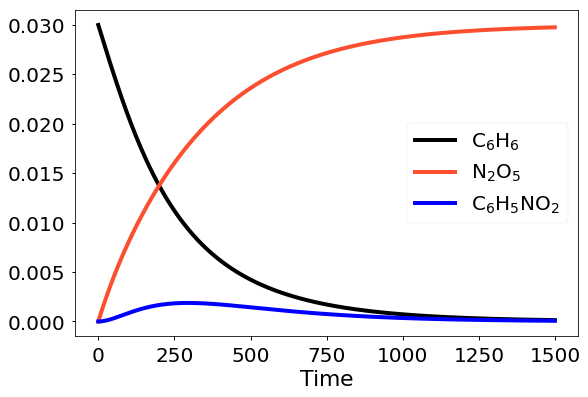

In [3]:
df = general_functions.model(
    np.arange(0, 1500, 1), # time steps
    [0.03, 0, 0], # initial conditions
    [r'$\mathrm{C_6H_6}$',r'$\mathrm{N_2O_5}$', r'$\mathrm{C_6H_5NO_2}$'], # names of variables
    function_derivatives, # name function derivatives
    returnDataFrame=True, plotresults=True,
    # as of here: function specific parameters
    k=2, Q=10, V=3000, C6H6_in=0, N2O5_in=0.03)

$$\frac{d[C_6H_6]}{dt}= -2k{[C_6H_6]}^2[N_2O_5] - \frac{Q}{V}( [C_6H_6])$$
$$\frac{d[N_2O_5]}{dt}= -k{[C_6H_6]}^2[N_2O_5] + \frac{Q}{V}({[N_2O_5]}_{in} - [N_2O_5])$$
$$\frac{d[C_6H_5NO_2]}{dt}= 2k{[C_6H_6]}^2[N_2O_5] - \frac{Q}{V}[C_6H_5NO_2] $$

## Impact of initial conditions and inlet $N_2O_5$

In [21]:
def interactive_model(C6H6, N2O5, C6H5NO2):
    general_functions.model(
        np.arange(0, 1500, 1), # time steps
        [C6H6, N2O5, C6H5NO2], # initial conditions
        [r'$\mathrm{C_6H_6}$',r'$\mathrm{N_2O_5}$', r'$\mathrm{C_6H_5NO_2}$'], # names of variables
        function_derivatives, # name function derivatives
        returnDataFrame=True, plotresults=True,twinx=False,
        # Specify parameter values
        k=2, Q=10, V=3000, C6H6_in=0, N2O5_in=0.03)
interact(interactive_model,
         C6H6=FloatSlider(value=0.03, min=0, max=0.1, step=0.01, description=r'$C_6H_6$', continuous_update=False),
         N2O5=FloatSlider(value=0, min=0, max=0.1, step=0.01, description=r'$N_2O_5$', continuous_update=False),
         C6H5NO2=FloatSlider(value=0, min=0, max=0.1, step=0.01, description=r'$C_6H_5NO_2$', continuous_update=False),
         N2O5_in=FloatSlider(value=0.03, min=0, max=0.1, step=0.01, description=r'$N_2O_5_{inlet}$', continuous_update=False));

interactive(children=(FloatSlider(value=0.03, continuous_update=False, description='$C_6H_6$', max=0.1, step=0…

$$\frac{d[C_6H_6]}{dt}= -2k{[C_6H_6]}^2[N_2O_5] - \frac{Q}{V}( [C_6H_6])$$
$$\frac{d[N_2O_5]}{dt}= -k{[C_6H_6]}^2[N_2O_5] + \frac{Q}{V}({[N_2O_5]}_{in} - [N_2O_5])$$
$$\frac{d[C_6H_5NO_2]}{dt}= 2k{[C_6H_6]}^2[N_2O_5] - \frac{Q}{V}[C_6H_5NO_2] $$

## Impact of kinetic coefficient and flow parameters

In [6]:
interact(general_functions.model,
         timesteps=fixed(np.arange(0, 1500, 1)),# time steps
         init=fixed([0.03, 0, 0]), # initial conditions
         varnames=fixed([r'$\mathrm{C_6H_6}$',r'$\mathrm{N_2O_5}$', r'$\mathrm{C_6H_5NO_2}$']), # names of variables
         f=fixed(function_derivatives), # name function derivatives
         returnDataFrame=fixed(False), plotresults=fixed(True), twinax=fixed(False),
         # Specify parameter values
         C6H6_in=fixed(0), N2O5_in=fixed(0.03),
         k=FloatSlider(value=1, min=0., max=10, step=0.1,description=r'$k$', continuous_update=False),
         Q=FloatSlider(value=10, min=0., max=20, step=1, description=r'$Q$', continuous_update=False),
         V=FloatSlider(value=1500, min=0., max=6000, step=100,description=r'$V$', continuous_update=False));

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='$k$', max=10.0), FloatSlide…

$$\frac{d[C_6H_6]}{dt}= -2k{[C_6H_6]}^2[N_2O_5] - \frac{Q}{V}( [C_6H_6])$$
$$\frac{d[N_2O_5]}{dt}= -k{[C_6H_6]}^2[N_2O_5] + \frac{Q}{V}({[N_2O_5]}_{in} - [N_2O_5])$$
$$\frac{d[C_6H_5NO_2]}{dt}= 2k{[C_6H_6]}^2[N_2O_5] - \frac{Q}{V}[C_6H_5NO_2] $$

## Sensitivity analysis of the nitrobenzene model

In [7]:
interact(general_functions.sensitivity,
    timesteps=fixed(np.arange(0, 1500, 1)), # time steps
    init=fixed([0.03, 0, 0]), # initial conditions
    varnames=fixed([r'$\mathrm{C_6H_6}$',r'$\mathrm{N_2O_5}$', r'$\mathrm{C_6H_5NO_2}$']), # names of variables
    f=fixed(function_derivatives), # name function derivatives
    parametername=ToggleButtons(options=['k', 'Q', 'V', 'C6H6_in', 'N2O5_in']),
    log_perturbation = IntSlider(value=-4, min=-15, max=-1, step=1, continuous_update=False),
    sort=ToggleButtons(options=[
            'absolute sensitivity', 'relative sensitivity parameter',
            'relative sensitivity variable','relative total sensitivity']),
    # Specify parameter values
    k=fixed(2), Q=fixed(10), V=fixed(3000), C6H6_in=fixed(0), N2O5_in=fixed(0.03));


interactive(children=(ToggleButtons(description='parametername', options=('k', 'Q', 'V', 'C6H6_in', 'N2O5_in')…